In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import phik
    
import warnings
warnings.filterwarnings('ignore')

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

#for 100% jupyter notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pandas DataFrame column and row display limits
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
def Taux_de_NAN(df):
    '''
    Cette fonction retourne un barplot représentant le taux de NAN des colonnes d'un dataframe,
    du plus rempli au moins rempli.
    '''
    # Calcul du taux de valeurs non manquantes pour chaque colonne
    Taux_de_NAN = df.isnull().mean()*100
    Taux_de_NAN = Taux_de_NAN.sort_values(ascending=False).reset_index()
    Taux_de_NAN.columns = ['variables', 'taux']
    
    Taux_de_NAN = Taux_de_NAN[Taux_de_NAN['taux'] >0]

    # Création du barplot
    fig = plt.figure(figsize=(20, 6))
    plt.title('Taux de NAN par indicateur', fontsize=20)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=90)
    sns.barplot(x='variables', y='taux', data=Taux_de_NAN, palette='viridis')

    # Afficher le graphique
    plt.show()

In [3]:

import psutil
import os

def print_memory_usage():
    pid = os.getpid()
    py = psutil.Process(pid)
    memory_use = py.memory_info()[0]/(2.**30)
    print(f'mémoire RAM utilisée: {memory_use:.2f} GB')

In [4]:
def plot_continuous_variable(data, column_name, target_column='TARGET', plots=['distplot', 'CDF', 'box', 'violin'], scale_limits=None, figsize=(20,8), log_scale=False):
    '''
    Fonction pour dessiner la distribution des variables continues.
    
    Inputs:
    - data: DataFrame - Le DataFrame à partir duquel tracer.
    - column_name: str - Nom de la colonne dont la distribution doit être tracée.
    - target_column: str, default 'TARGET' - Colonne cible pour les distributions conditionnelles.
    - plots: list, default = ['distplot', 'CDF', 'box', 'violin'] - Liste des graphiques à tracer.
    - scale_limits: tuple (left, right), default = None - Pour contrôler les limites des valeurs à tracer.
    - figsize: tuple, default = (20,8) - Taille de la figure.
    - log_scale: bool, default = False - Utiliser une échelle logarithmique pour les variables avec des points aberrants.
    '''

    if not isinstance(data, pd.DataFrame):
        raise ValueError("Le paramètre 'data' doit être un DataFrame Pandas.")
    if column_name not in data.columns:
        raise ValueError(f"La colonne '{column_name}' n'existe pas dans le DataFrame.")

    data_to_plot = data.copy()
    if scale_limits:
        data_to_plot = data_to_plot[(data_to_plot[column_name] > scale_limits[0]) & (data_to_plot[column_name] < scale_limits[1])]

    valid_plots = {'CDF', 'distplot', 'box', 'violin'}
    if not all(plot in valid_plots for plot in plots):
        raise ValueError("Valeur non valide dans 'plots'. Les options valides sont: 'CDF', 'distplot', 'box', 'violin'.")

    plt.figure(figsize=figsize)
    sns.set_style('whitegrid')

    for i, plot_type in enumerate(plots):
        plt.subplot(1, len(plots), i + 1)
        plt.subplots_adjust(wspace=0.25)

        if plot_type == 'CDF':
            for value in data[target_column].unique():
                subset = data_to_plot[data_to_plot[target_column] == value]
                sns.ecdfplot(subset[column_name], label=f'Classe {value}')
            plt.xlabel(column_name)
            plt.ylabel('Probabilité Cumulée')
            plt.title(f'CDF de {column_name}')
            plt.legend(fontsize='medium')
        
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (échelle log)')

        if plot_type == 'distplot':
            for value in data[target_column].unique():
                sns.kdeplot(data_to_plot[data_to_plot[target_column] == value][column_name], label=f'Classe {value}', fill=True)
            plt.xlabel(column_name)
            plt.ylabel('Densité')
            plt.title(f'Distribution de {column_name}')
            plt.legend(fontsize='medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (échelle log)')

        if plot_type == 'violin':
            sns.violinplot(x=target_column, y=column_name, data=data_to_plot)
            plt.title(f'Violin Plot de {column_name}')
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (échelle log)')

        if plot_type == 'box':
            sns.boxplot(x=target_column, y=column_name, data=data_to_plot)
            plt.title(f'Box Plot de {column_name}')
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (échelle log)')

plt.show()

In [34]:
application_train = pd.read_csv('C:/P7_git/data_api/application_train.csv')
application_test = pd.read_csv('C:/P7_git/data_api/application_test.csv')
bureau = pd.read_csv('C:/P7_git/data_api/bureau.csv')
bureau_balance = pd.read_csv('C:/P7_git/data_api/bureau_balance.csv')
cc_balance = pd.read_csv('C:/P7_git/data_api/credit_card_balance.csv')
#pd.read_csv('C:/P7_git/data_api/HomeCredit_columns_description.csv', encoding = 'ISO-8859-1')
installments_payments = pd.read_csv('C:/P7_git/data_api/installments_payments.csv')
POS_CASH_balance = pd.read_csv('C:/P7_git/data_api/POS_CASH_balance.csv')
previous_application = pd.read_csv('C:/P7_git/data_api/previous_application.csv')
#pd.read_csv('C:/P7_git/data_api/sample_submission.csv')

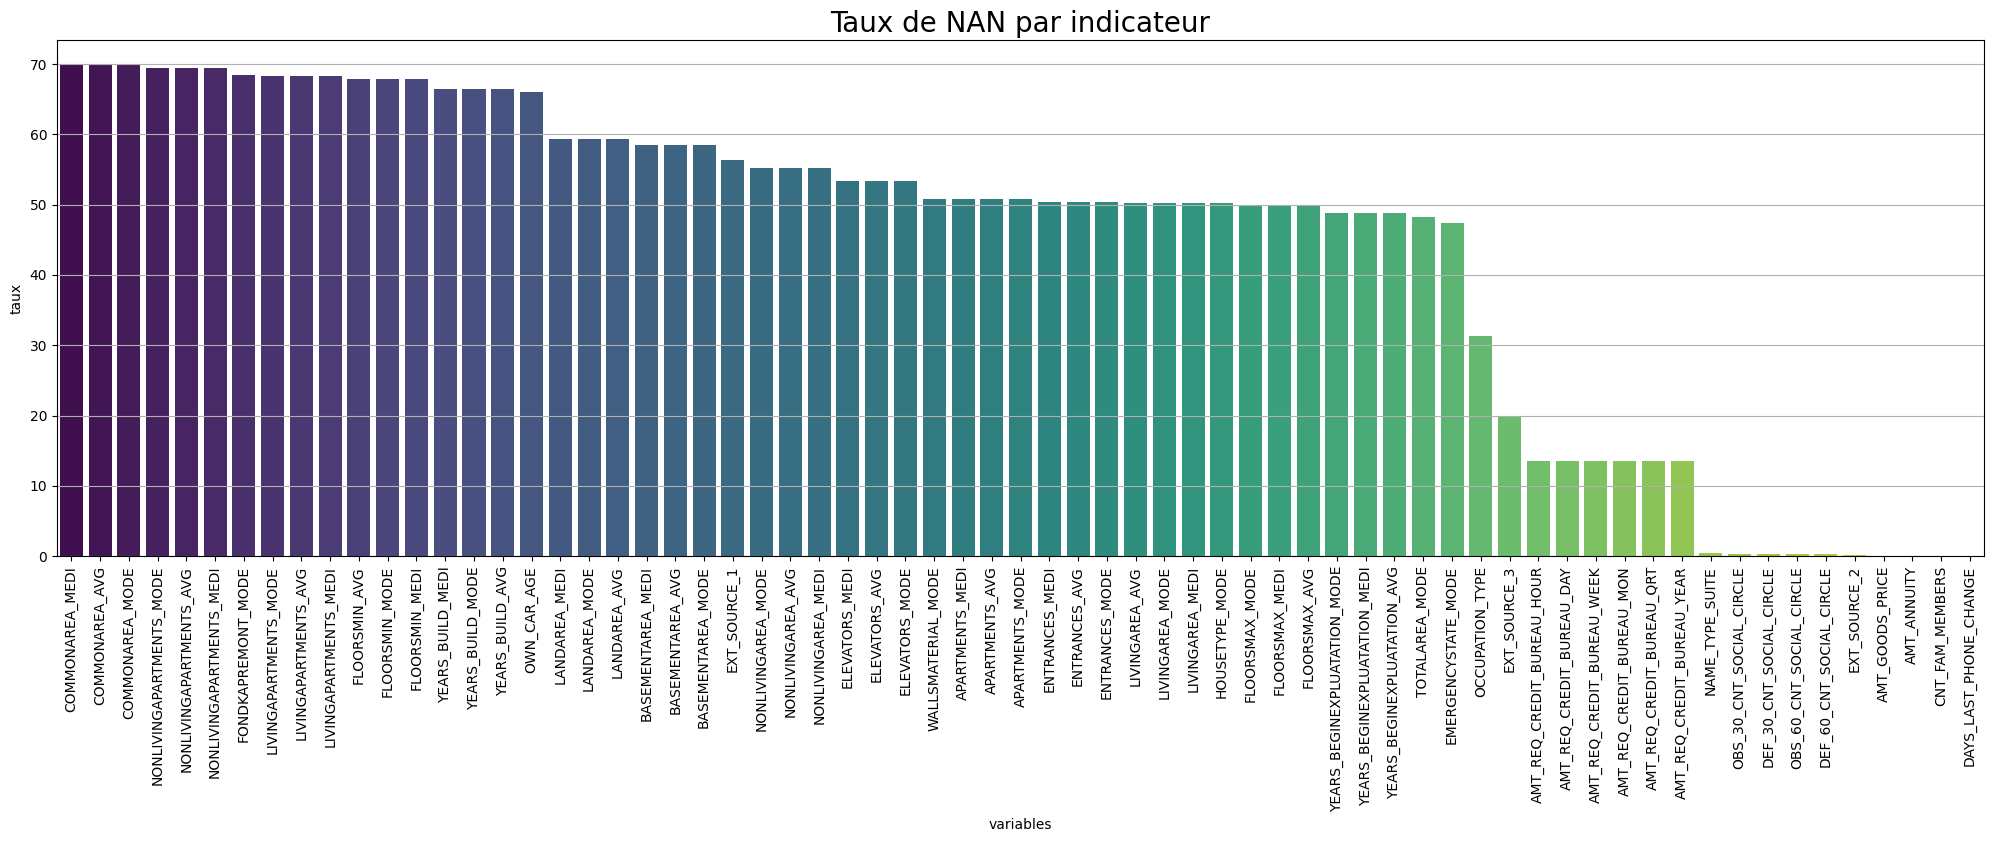

In [15]:
Taux_de_NAN(application_train)

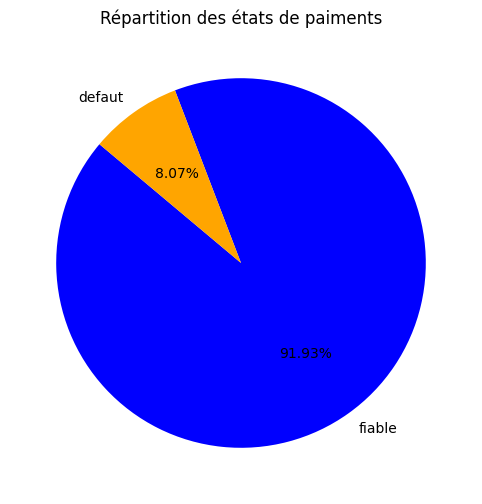

In [16]:
plt.figure(figsize=(12, 6))
colors = ['blue', 'orange']
specific_values = [0, 1]
counts = application_train['TARGET'].value_counts().loc[specific_values]
#labels = counts.index
if specific_values == [0, 1]: 
    labels = ['fiable', 'defaut']
values = counts.values
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title("Répartition des états de paiments")
plt.show()

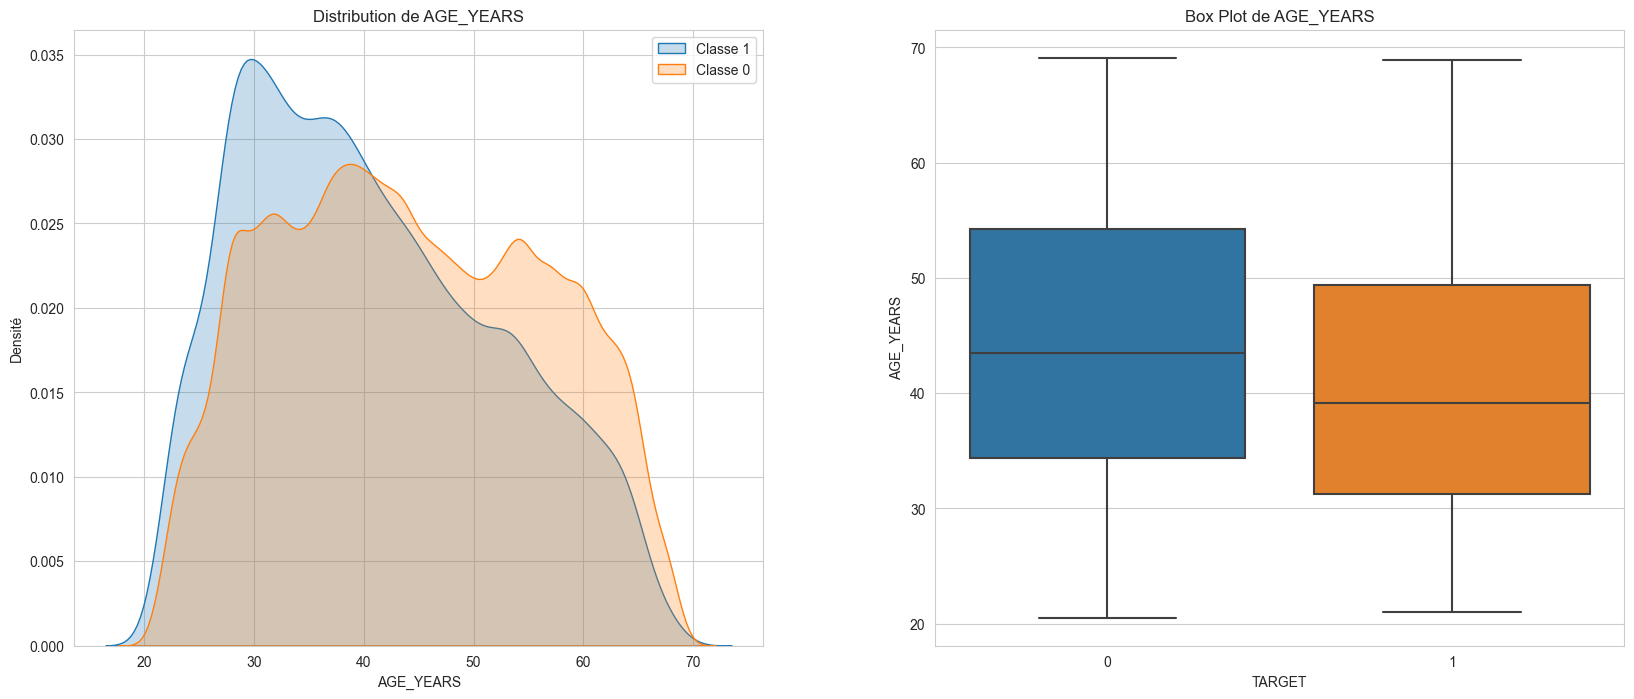

In [17]:
application_train['AGE_YEARS'] = application_train['DAYS_BIRTH'] * -1 / 365
plot_continuous_variable(application_train, 'AGE_YEARS', plots = ['distplot','box'])
_ = application_train.pop('AGE_YEARS')

In [18]:
application_train['DAYS_EMPLOYED'].describe()


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

#### La valeur max de [DAYS_EMPLOYED] est abérante, je vais réduire à la durée de 40 ans , soit 12640 jours

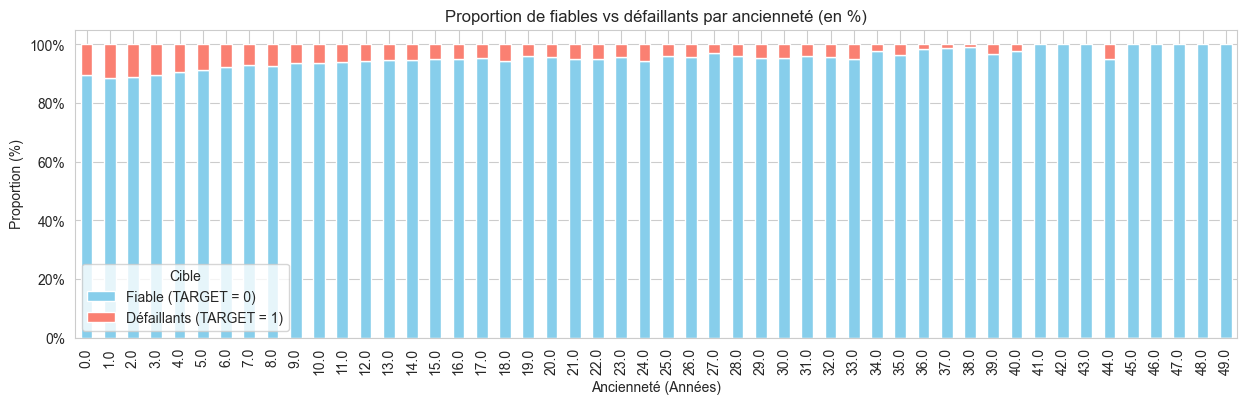

In [19]:
data = application_train[application_train['DAYS_EMPLOYED'] < 15000]
data['EMPLOYED_YEARS_ROUNDED'] = (data['DAYS_EMPLOYED'] * -1 / 365).round()
yearly_target_distribution = data.groupby('EMPLOYED_YEARS_ROUNDED')['TARGET'].value_counts(normalize=True).unstack()
yearly_target_distribution = yearly_target_distribution.fillna(0)  # Filling NaN values with 0

plt.figure(figsize=(15, 4))
yearly_target_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Proportion de fiables vs défaillants par ancienneté (en %)")
plt.xlabel('Ancienneté (Années)')
plt.ylabel('Proportion (%)')
plt.legend(['Fiable (TARGET = 0)', 'Défaillants (TARGET = 1)'], title='Cible')
plt.show()

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


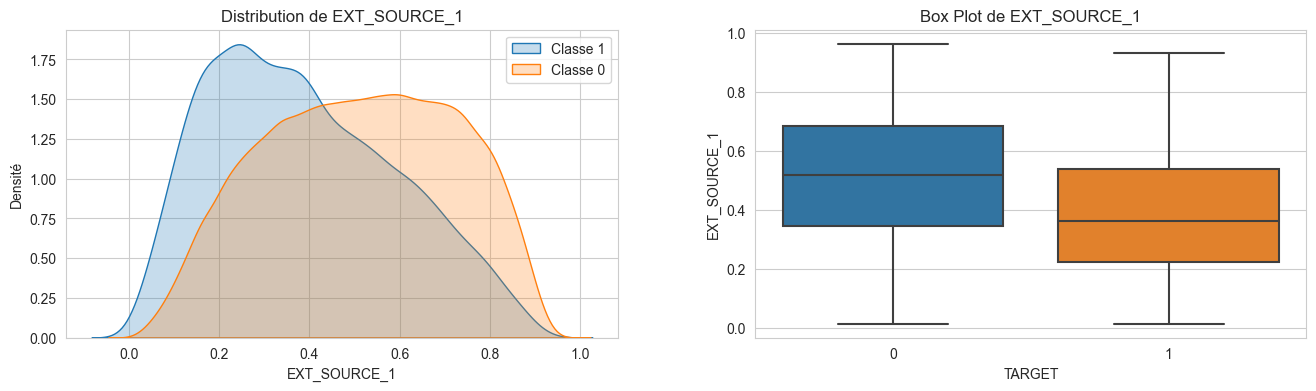

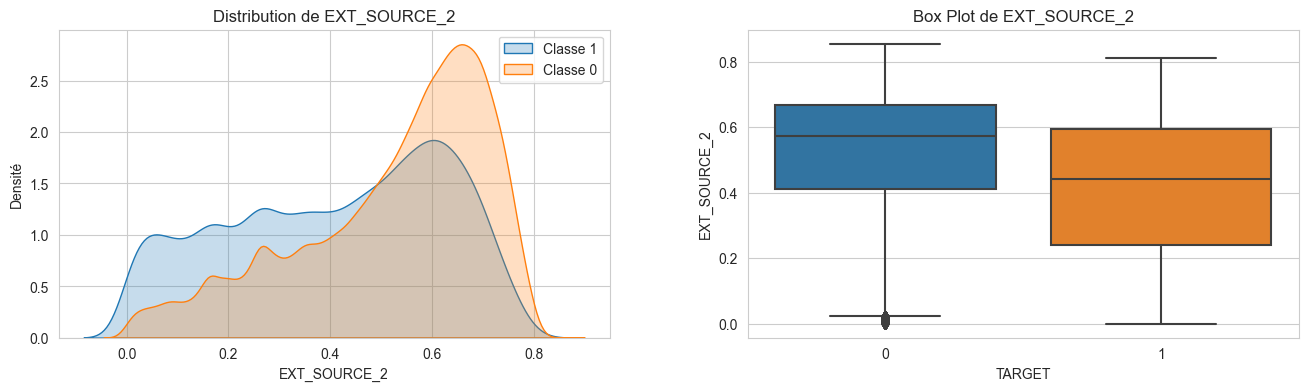

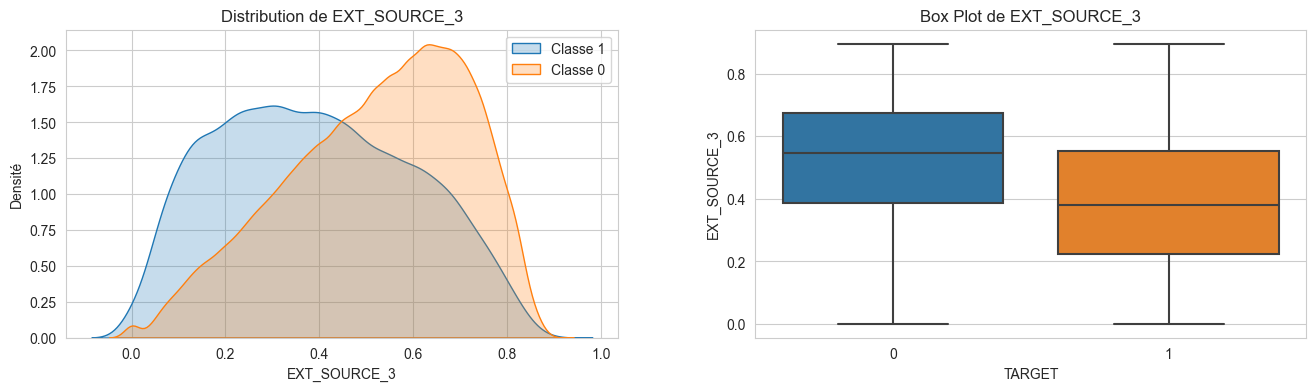

In [20]:
print('-'*100)
plot_continuous_variable(application_train, 'EXT_SOURCE_1', plots = ['distplot', 'box'], figsize = (16,4))
print('-'*100)
plot_continuous_variable(application_train, 'EXT_SOURCE_2', plots = ['distplot', 'box'], figsize = (16,4))
print('-'*100)
plot_continuous_variable(application_train, 'EXT_SOURCE_3', plots = ['distplot', 'box'], figsize = (16,4))
print('-'*100)

### Les features qui semblent le plus marquer d'écart entre les clients fiables et les clients défaillants sont celles de l'age et les 3 [EXT_SOURCE]

### Nous allons vérifier les intéractions entre les variables et la target

In [21]:
numerical_features = application_train.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
target_correlation = correlation_matrix['TARGET'].sort_values(ascending=True)
target_correlation

EXT_SOURCE_3                   -0.178919
EXT_SOURCE_2                   -0.160472
EXT_SOURCE_1                   -0.155317
DAYS_EMPLOYED                  -0.044932
FLOORSMAX_AVG                  -0.044003
FLOORSMAX_MEDI                 -0.043768
FLOORSMAX_MODE                 -0.043226
AMT_GOODS_PRICE                -0.039645
REGION_POPULATION_RELATIVE     -0.037227
ELEVATORS_AVG                  -0.034199
ELEVATORS_MEDI                 -0.033863
FLOORSMIN_AVG                  -0.033614
FLOORSMIN_MEDI                 -0.033394
LIVINGAREA_AVG                 -0.032997
LIVINGAREA_MEDI                -0.032739
FLOORSMIN_MODE                 -0.032698
TOTALAREA_MODE                 -0.032596
ELEVATORS_MODE                 -0.032131
LIVINGAREA_MODE                -0.030685
AMT_CREDIT                     -0.030369
APARTMENTS_AVG                 -0.029498
APARTMENTS_MEDI                -0.029184
FLAG_DOCUMENT_6                -0.028602
APARTMENTS_MODE                -0.027284
LIVINGAPARTMENTS

In [47]:
#application_train['TARGET_CAT'] = application_train['TARGET'].astype(bool)
cat_features = application_train.select_dtypes(include=[object])
cat_features['TARGET'] = application_train['TARGET']
cat_features.head(1)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,1


In [49]:
cat_encoded = pd.DataFrame()

for col in cat_features.columns:
    label_encoder = LabelEncoder()
    cat_encoded[col] = label_encoder.fit_transform(cat_features[col])

In [51]:
correlation_matrix_cat = cat_encoded.corr()
target_correlation_cat = correlation_matrix_cat['TARGET'].sort_values(ascending=False)
target_correlation_cat

TARGET                        1.000000
NAME_EDUCATION_TYPE           0.054699
CODE_GENDER                   0.054692
NAME_INCOME_TYPE              0.046829
EMERGENCYSTATE_MODE           0.041955
HOUSETYPE_MODE                0.040211
WALLSMATERIAL_MODE            0.037076
NAME_HOUSING_TYPE             0.034489
FONDKAPREMONT_MODE            0.026924
NAME_TYPE_SUITE               0.008074
WEEKDAY_APPR_PROCESS_START    0.004002
NAME_FAMILY_STATUS           -0.004127
FLAG_OWN_REALTY              -0.006148
OCCUPATION_TYPE              -0.019510
FLAG_OWN_CAR                 -0.021851
ORGANIZATION_TYPE            -0.030765
NAME_CONTRACT_TYPE           -0.030896
Name: TARGET, dtype: float64

In [ ]:
for cat_feat in cat_features:
    means = cat_features.groupby(cat_feat)['TARGET_CAT'].mean()
    data_encoded['cat_feat'] = cat_features[cat_feat].map(means)
correlation_matrix_cat = data_encoded.corr()
target_correlation_cat = correlation_matrix_cat['TARGET_CAT'].sort_values(ascending=True)
target_correlation_cat

TARGET_CAT    1.0
cat_feat      1.0
Name: TARGET_CAT, dtype: float64